Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR
### Adaptado por: Vitor Hugo Dias Santos
#### Sistemas de Informação - UFMG

lucas.ferro.2000@hotmail.com

vhugosantos@gmail.com

#Tokenização e normalização do corpus

In [5]:
# prompt: converta um arquivo pdf em txt padrão utf-8

%pip install PyPDF2

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = 'PDF/Asimov_-Isaac-Eu_-Robô-Editora-Aleph-_2015_.pdf'  # Replace with your PDF file path
txt_file_path = 'output.txt'      # Replace with desired output file path

convert_pdf_to_txt(pdf_file_path, txt_file_path)


Note: you may need to restart the kernel to use updated packages.
PDF 'PDF/Asimov_-Isaac-Eu_-Robô-Editora-Aleph-_2015_.pdf' converted to 'output.txt' successfully.


In [6]:
# Instalação do NLTK
%pip install nltk==3.6.2

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install pandas nltk matplotlib wordcloud Pillow


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importação de bibliotecas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/hugosantos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# pd.set_option('max_columns', None)
# pd.set_option('max_colwidth', None)

In [10]:
# Pega todas as pontuações
remove_pt = string.punctuation
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# Baixa as stopwords para o português no NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hugosantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [12]:
stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',

In [13]:
stop_words_pt.add('ainda')
stop_words_pt.add('porém')
stop_words_pt

{'a',
 'ainda',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 '

In [14]:
PATH = 'output.txt'

In [15]:
with open(PATH , 'r', encoding='utf8') as f:
    filecontent = f.read()

print(filecontent[0:])

A John W . Campbell Jr ., que apadrinhou os r obôsSUMÁRIO Eu, Robô Introdução 1 • Robbie 2 • Andando em círculos 3 • Razão 4 • É preciso pegar o coelho 5 • Mentiroso! 6 • Um robozinho sumido 7 • Evasão! 8 • Evidência 9 • O conflito evitável Sobre o autor Notas de rodapé Créditos e copyrightO LHEI P ARA AS MINHAS ANOT AÇÕES e não gostei delas. Eu tinha passado três dias na U.S. Ro bots e poderia muito bem tê-los passado em c asa, com a Enciclopédia T elúrica. Susan Calvin havia nascido no a no de 1982, disseram-me, o qu e queria dizer que ela tin ha 75 anos ago ra. T odos sabiam disso. De forma mais do que apr opriada, a U.S. Robots and Mechanical Men, Inc. também tinha 75 anos, uma vez q ue fora no ano do nascimento da dra. Calvin qu e Lawr ence Robertson conseguira os documentos de constituição do que viria a ser o mais estranho gigante industria l da história da humanidade. Bom, todos sabiam disso também. Aos 20 anos d e idade, Susan Calvin participara de um se minário específico sob

In [16]:
type(filecontent)

str

In [17]:
len(filecontent) # número de tokens

469958

## Transformando o texto completo em sentenças (tokenizer do NLTK)

In [18]:
sentencas = []
for sentence in sent_tokenize(filecontent, language = 'portuguese'):
    sentencas.append(sentence)

In [19]:
index = 1
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: A John W .
2: Campbell Jr ., que apadrinhou os r obôsSUMÁRIO Eu, Robô Introdução 1 • Robbie 2 • Andando em círculos 3 • Razão 4 • É preciso pegar o coelho 5 • Mentiroso!
3: 6 • Um robozinho sumido 7 • Evasão!
4: 8 • Evidência 9 • O conflito evitável Sobre o autor Notas de rodapé Créditos e copyrightO LHEI P ARA AS MINHAS ANOT AÇÕES e não gostei delas.
5: Eu tinha passado três dias na U.S.
6: Ro bots e poderia muito bem tê-los passado em c asa, com a Enciclopédia T elúrica.
7: Susan Calvin havia nascido no a no de 1982, disseram-me, o qu e queria dizer que ela tin ha 75 anos ago ra.
8: T odos sabiam disso.
9: De forma mais do que apr opriada, a U.S.
10: Robots and Mechanical Men, Inc. também tinha 75 anos, uma vez q ue fora no ano do nascimento da dra.
11: Calvin qu e Lawr ence Robertson conseguira os documentos de constituição do que viria a ser o mais estranho gigante industria l da história da humanidade.
12: Bom, todos sabiam disso também.
13: Aos 20 anos d e idade, Susan Calvin 

## Segmentação por quebra de linha e depois pelo tokenizer do NLTK

In [20]:
sentencas_linha = []
for sentence in filecontent.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

In [21]:
sentencas_linha[0:10]

['A John W .',
 'Campbell Jr ., que apadrinhou os r obôsSUMÁRIO Eu, Robô Introdução 1 • Robbie 2 • Andando em círculos 3 • Razão 4 • É preciso pegar o coelho 5 • Mentiroso!',
 '6 • Um robozinho sumido 7 • Evasão!',
 '8 • Evidência 9 • O conflito evitável Sobre o autor Notas de rodapé Créditos e copyrightO LHEI P ARA AS MINHAS ANOT AÇÕES e não gostei delas.',
 'Eu tinha passado três dias na U.S.',
 'Ro bots e poderia muito bem tê-los passado em c asa, com a Enciclopédia T elúrica.',
 'Susan Calvin havia nascido no a no de 1982, disseram-me, o qu e queria dizer que ela tin ha 75 anos ago ra.',
 'T odos sabiam disso.',
 'De forma mais do que apr opriada, a U.S.',
 'Robots and Mechanical Men, Inc. também tinha 75 anos, uma vez q ue fora no ano do nascimento da dra.']

In [22]:
index = 1
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: A John W .
2: Campbell Jr ., que apadrinhou os r obôsSUMÁRIO Eu, Robô Introdução 1 • Robbie 2 • Andando em círculos 3 • Razão 4 • É preciso pegar o coelho 5 • Mentiroso!
3: 6 • Um robozinho sumido 7 • Evasão!
4: 8 • Evidência 9 • O conflito evitável Sobre o autor Notas de rodapé Créditos e copyrightO LHEI P ARA AS MINHAS ANOT AÇÕES e não gostei delas.
5: Eu tinha passado três dias na U.S.
6: Ro bots e poderia muito bem tê-los passado em c asa, com a Enciclopédia T elúrica.
7: Susan Calvin havia nascido no a no de 1982, disseram-me, o qu e queria dizer que ela tin ha 75 anos ago ra.
8: T odos sabiam disso.
9: De forma mais do que apr opriada, a U.S.
10: Robots and Mechanical Men, Inc. também tinha 75 anos, uma vez q ue fora no ano do nascimento da dra.
11: Calvin qu e Lawr ence Robertson conseguira os documentos de constituição do que viria a ser o mais estranho gigante industria l da história da humanidade.
12: Bom, todos sabiam disso também.
13: Aos 20 anos d e idade, Susan Calvin 

## Tokenização de cada sentença em palavras (tokenizer do NLTK)





In [23]:
sentencas_tokenizadas = []

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)
index = 1
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {tokens}')
    index+=1

1: ['A', 'John', 'W', '.']
2: ['Campbell', 'Jr', '.', ',', 'que', 'apadrinhou', 'os', 'r', 'obôsSUMÁRIO', 'Eu', ',', 'Robô', 'Introdução', '1', '•', 'Robbie', '2', '•', 'Andando', 'em', 'círculos', '3', '•', 'Razão', '4', '•', 'É', 'preciso', 'pegar', 'o', 'coelho', '5', '•', 'Mentiroso', '!']
3: ['6', '•', 'Um', 'robozinho', 'sumido', '7', '•', 'Evasão', '!']
4: ['8', '•', 'Evidência', '9', '•', 'O', 'conflito', 'evitável', 'Sobre', 'o', 'autor', 'Notas', 'de', 'rodapé', 'Créditos', 'e', 'copyrightO', 'LHEI', 'P', 'ARA', 'AS', 'MINHAS', 'ANOT', 'AÇÕES', 'e', 'não', 'gostei', 'delas', '.']
5: ['Eu', 'tinha', 'passado', 'três', 'dias', 'na', 'U.S', '.']
6: ['Ro', 'bots', 'e', 'poderia', 'muito', 'bem', 'tê-los', 'passado', 'em', 'c', 'asa', ',', 'com', 'a', 'Enciclopédia', 'T', 'elúrica', '.']
7: ['Susan', 'Calvin', 'havia', 'nascido', 'no', 'a', 'no', 'de', '1982', ',', 'disseram-me', ',', 'o', 'qu', 'e', 'queria', 'dizer', 'que', 'ela', 'tin', 'ha', '75', 'anos', 'ago', 'ra', '.']
8: 

## Pre-processamento dos elementos tokenizados
A ideia aqui é retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em minúsculos, retirar espaços e quebras de linhas adicionais desnecessários.

In [24]:
from typing import TextIO
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt+'–'+'🙁'+'\’'+'\”'+"“") for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)

index = 1
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {texto}')
    index+=1


1: john w
2: campbell jr apadrinhou r obôssumário robô introdução • robbie • andando círculos • razão • preciso pegar coelho • mentiroso
3: • robozinho sumido • evasão
4: • evidência • conflito evitável sobre autor notas rodapé créditos copyrighto lhei p ara anot ações gostei
5: passado três dias us
6: ro bots poderia bem têlos passado c asa enciclopédia t elúrica
7: susan calvin havia nascido disseramme qu queria dizer tin ha anos ago ra
8: t odos sabiam disso
9: forma apr opriada us
10: robots and mechanical men inc anos vez q ue ano nascimento dra
11: calvin qu lawr ence robertson conseguira documentos constituição viria estranho gigante industria l história humanidade
12: bom todos sabiam disso
13: anos d idade susan calvin participara minário específico sobr psicomatemática dr
14: alfr ed lanning us
15: robots apr esen tara primeir r obô móvel equipado voz
16: r obô grande desajeitado fe io cheirava óleo máquina destinado trabalhar minas pr ojetadas mer cúrio
17: podia falar fazer

#NGramas

In [25]:
len(sent_tokenizada_preprocessed)

6855

In [26]:
import os
ngram_value = 4
most_common_value = 100

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
index = 1
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: []
2: [('campbell', 'jr', 'apadrinhou', 'r'), ('jr', 'apadrinhou', 'r', 'obôssumário'), ('apadrinhou', 'r', 'obôssumário', 'robô'), ('r', 'obôssumário', 'robô', 'introdução'), ('obôssumário', 'robô', 'introdução', '•'), ('robô', 'introdução', '•', 'robbie'), ('introdução', '•', 'robbie', '•'), ('•', 'robbie', '•', 'andando'), ('robbie', '•', 'andando', 'círculos'), ('•', 'andando', 'círculos', '•'), ('andando', 'círculos', '•', 'razão'), ('círculos', '•', 'razão', '•'), ('•', 'razão', '•', 'preciso'), ('razão', '•', 'preciso', 'pegar'), ('•', 'preciso', 'pegar', 'coelho'), ('preciso', 'pegar', 'coelho', '•'), ('pegar', 'coelho', '•', 'mentiroso')]
3: [('•', 'robozinho', 'sumido', '•'), ('robozinho', 'sumido', '•', 'evasão')]
4: [('•', 'evidência', '•', 'conflito'), ('evidência', '•', 'conflito', 'evitável'), ('•', 'conflito', 'evitável', 'sobre'), ('conflito', 'evitável', 'sobre', 'autor'), ('evitável', 'sobre', 'autor', 'notas'), ('sobre', 'autor', 'notas', 'rodapé'), ('autor', 'no

In [27]:
index = 1
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: ('campbell', 'jr', 'apadrinhou', 'r')
2: ('jr', 'apadrinhou', 'r', 'obôssumário')
3: ('apadrinhou', 'r', 'obôssumário', 'robô')
4: ('r', 'obôssumário', 'robô', 'introdução')
5: ('obôssumário', 'robô', 'introdução', '•')
6: ('robô', 'introdução', '•', 'robbie')
7: ('introdução', '•', 'robbie', '•')
8: ('•', 'robbie', '•', 'andando')
9: ('robbie', '•', 'andando', 'círculos')
10: ('•', 'andando', 'círculos', '•')
11: ('andando', 'círculos', '•', 'razão')
12: ('círculos', '•', 'razão', '•')
13: ('•', 'razão', '•', 'preciso')
14: ('razão', '•', 'preciso', 'pegar')
15: ('•', 'preciso', 'pegar', 'coelho')
16: ('preciso', 'pegar', 'coelho', '•')
17: ('pegar', 'coelho', '•', 'mentiroso')
18: ('•', 'robozinho', 'sumido', '•')
19: ('robozinho', 'sumido', '•', 'evasão')
20: ('•', 'evidência', '•', 'conflito')
21: ('evidência', '•', 'conflito', 'evitável')
22: ('•', 'conflito', 'evitável', 'sobre')
23: ('conflito', 'evitável', 'sobre', 'autor')
24: ('evitável', 'sobre', 'autor', 'notas')
25: ('s

In [28]:
len(ngram_list)

28492

In [29]:
common

[(('geor', 'ge', 'w', 'eston'), 8),
 (('ár', 'ea', 'quilômetr', 'quadrados'), 5),
 (('b', 'população', 'c', 'capital'), 5),
 (('páginas', 'compre', 'agora', 'leia'), 5),
 (('ea', 'quilômetr', 'quadrados', 'b'), 4),
 (('quilômetr', 'quadrados', 'b', 'população'), 4),
 (('quadrados', 'b', 'população', 'c'), 4),
 (('robots', 'and', 'mechanical', 'men'), 3),
 (('robots', 'mechanical', 'men', 'corp'), 3),
 (('pode', 'ferir', 'humano', 'inação'), 3),
 (('ferir', 'humano', 'inação', 'permitir'), 3),
 (('v', 'ocê', 'quer', 'dizer'), 3),
 (('fazer', 'contar', 'magoa', 'então'), 3),
 (('lado', 'último', 'instante', 'som'), 3),
 (('canal', 'méxico', 'dois', 'meses'), 3),
 (('and', 'mechanical', 'men', 'inc'), 2),
 (('v', 'ocê', 'per', 'gunta'), 2),
 (('expr', 'essão', 'r', 'osto'), 2),
 (('r', 'obôs', 'podiam', 'falar'), 2),
 (('sra', 'w', 'eston', 'esperou'), 2),
 (('t', 'enho', 'certeza', 'absoluta'), 2),
 (('v', 'ocê', 'per', 'guntou'), 2),
 (('gritou', 'sra', 'w', 'eston'), 2),
 (('disse', 's

In [30]:
df_common.head(30)

,Ngram,Count
0,"(geor, ge, w, eston)",8
1,"(ár, ea, quilômetr, quadrados)",5
2,"(b, população, c, capital)",5
3,"(páginas, compre, agora, leia)",5
4,"(ea, quilômetr, quadrados, b)",4
5,"(quilômetr, quadrados, b, população)",4
6,"(quadrados, b, população, c)",4
7,"(robots, and, mechanical, men)",3
8,"(robots, mechanical, men, corp)",3
9,"(pode, ferir, humano, inação)",3


In [31]:
# Quantidade de palavras
len(flat_ngram_counts)

28618

In [32]:
# Quantidade de palavras únicas
len(ngram_list)

28492

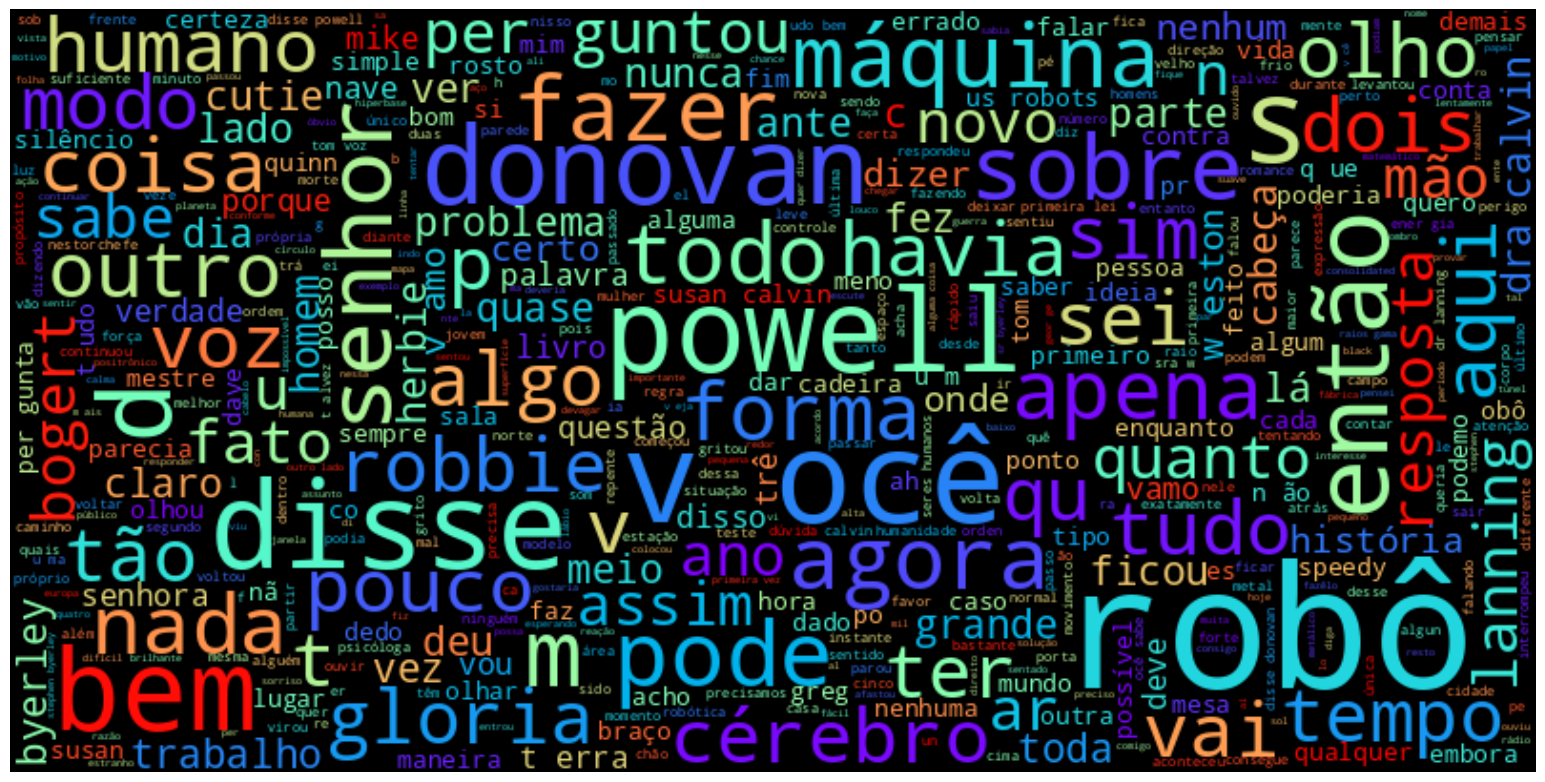

In [34]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'rainbow'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

In [ ]:
%pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.5 MB/s eta 0:00:00


fazer a frequencia, Carlos

In [ ]:
# prompt: leia um arquivo pdf e gere um txt com utf8

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace with your file paths):
pdf_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf'
txt_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.txt'

convert_pdf_to_txt(pdf_file_path, txt_file_path)


PDF '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf' converted to '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.txt' successfully.


In [ ]:
# prompt: coloque cada página do pdf num arquivo txt assinumeroado pagina001.txt, pagina002.txt etc. dentro de um diretorio.

import os
import PyPDF2

def split_pdf_to_txt_files(pdf_path, output_dir):
    """Splits a PDF file into individual text files, one per page."""

    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            num_pages = len(pdf_reader.pages)

            # Create the output directory if it doesn't exist
            os.makedirs(output_dir, exist_ok=True)

            for page_num in range(num_pages):
                page = pdf_reader.pages[page_num]
                text = page.extract_text()

                # Format the filename with leading zeros
                filename = os.path.join(output_dir, f"pagina{page_num + 1:03d}.txt")

                with open(filename, 'w', encoding='utf-8') as txt_file:
                    txt_file.write(text)

            print(f"PDF '{pdf_path}' split into text files in '{output_dir}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf'
output_directory = '/content/pdf_pages'  # Directory to save the text files
split_pdf_to_txt_files(pdf_file_path, output_directory)


PDF '/content/DalleScienzeDelLinguaggioAllEducazionePlurilingue.ocr.pdf' split into text files in '/content/pdf_pages' successfully.


In [ ]:
!tar -czvf /content/pdf_pages.tgz /content/pdf_pages/

tar: Removing leading `/' from member names
/content/pdf_pages/
/content/pdf_pages/pagina263.txt
/content/pdf_pages/pagina202.txt
/content/pdf_pages/pagina357.txt
/content/pdf_pages/pagina076.txt
/content/pdf_pages/pagina301.txt
/content/pdf_pages/pagina056.txt
/content/pdf_pages/pagina391.txt
/content/pdf_pages/pagina074.txt
/content/pdf_pages/pagina099.txt
/content/pdf_pages/pagina232.txt
/content/pdf_pages/pagina034.txt
/content/pdf_pages/pagina117.txt
/content/pdf_pages/pagina398.txt
/content/pdf_pages/pagina190.txt
/content/pdf_pages/pagina143.txt
/content/pdf_pages/pagina001.txt
/content/pdf_pages/pagina368.txt
/content/pdf_pages/pagina404.txt
/content/pdf_pages/pagina196.txt
/content/pdf_pages/pagina283.txt
/content/pdf_pages/pagina402.txt
/content/pdf_pages/pagina057.txt
/content/pdf_pages/pagina237.txt
/content/pdf_pages/pagina278.txt
/content/pdf_pages/pagina062.txt
/content/pdf_pages/pagina358.txt
/content/pdf_pages/pagina314.txt
/content/pdf_pages/pagina109.txt
/content/pdf